In [1]:
library(ggplot2)
data(economics, seals)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [3]:
head(seals)

lat,long,delta_long,delta_lat
29.7,-172.8,-0.9150462,0.14347525
30.7,-172.8,-0.8670125,0.12838872
31.7,-172.8,-0.8189249,0.11323248
32.7,-172.8,-0.7707763,0.09802037
33.7,-172.8,-0.7225597,0.08276624
34.7,-172.8,-0.6742680,0.06748393


<hr>

<img src = './ggplot2_primitives.png'/>

In [5]:
a <- ggplot(economics, aes(date, unemploy))
b <- ggplot(seals, aes(long, lat))

# Draw nothing

T**`geom_blank()`**: the blank geom draws nothing, but can be a useful way of ensuring common scales between different plots. See `expand_limits()` for more details.

In [9]:
args(geom_blank)

function (mapping = NULL, data = NULL, stat = "identity", position = "identity", 
    ..., show.legend = NA, inherit.aes = TRUE) 
NULL

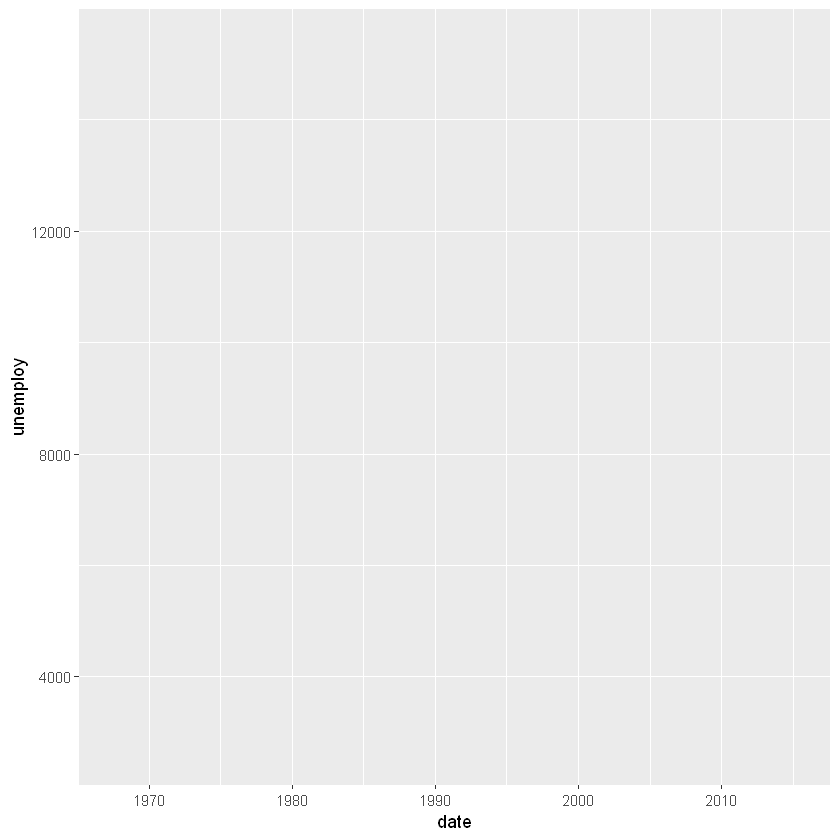

In [11]:
#nothing to show here
a + geom_blank()

# Line Segment and Curve

**`geom_segment()`** draws a straight line between points (x, y) and (xend, yend).  
**`geom_curve`** draws a curved line. See the underlying drawing function grid::curveGrob() for the parameters that control the curve.


```R
geom_segment(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  arrow = NULL,
  arrow.fill = NULL,
  lineend = "butt",
  linejoin = "round",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_curve(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  curvature = 0.5,
  angle = 90,
  ncp = 5,
  arrow = NULL,
  arrow.fill = NULL,
  lineend = "butt",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

### Aesthetic

**`geom_segment()`** understands the following aesthetics (required aesthetics are in bold):

**x**

**y**

**xend**

**yend**

alpha

colour

group

linetype

size

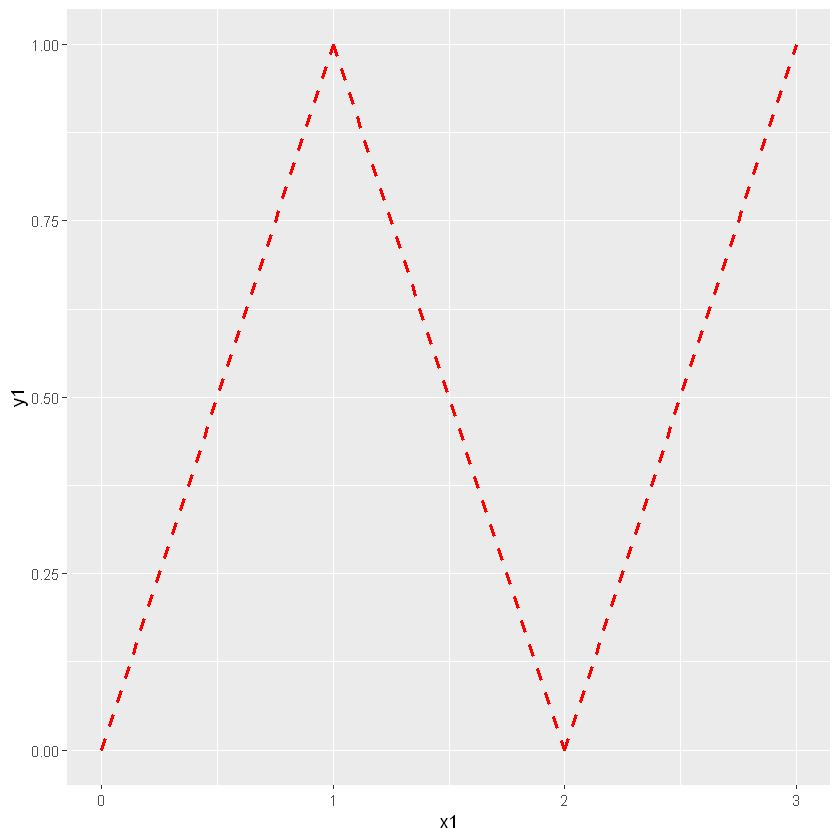

In [61]:
seg <- data.frame(
    x1 = c(0, 1, 2),
    y1 = c(0, 1, 0) , 
    x2 = c(1, 2, 3), 
    y2 = c(1, 0, 1)
)
#segments: (0,0) -> (1, 1), (1,1) -> (2,0), (2,0) -> (3, 1)
ggplot() + 
geom_segment(mapping = aes(x = x1, xend = x2, y = y1, yend = y2), 
             data = seg,
             color = 'red', #color
             size = 1,      #linewidth
             linetype = 'dashed')

**`arrow()`**

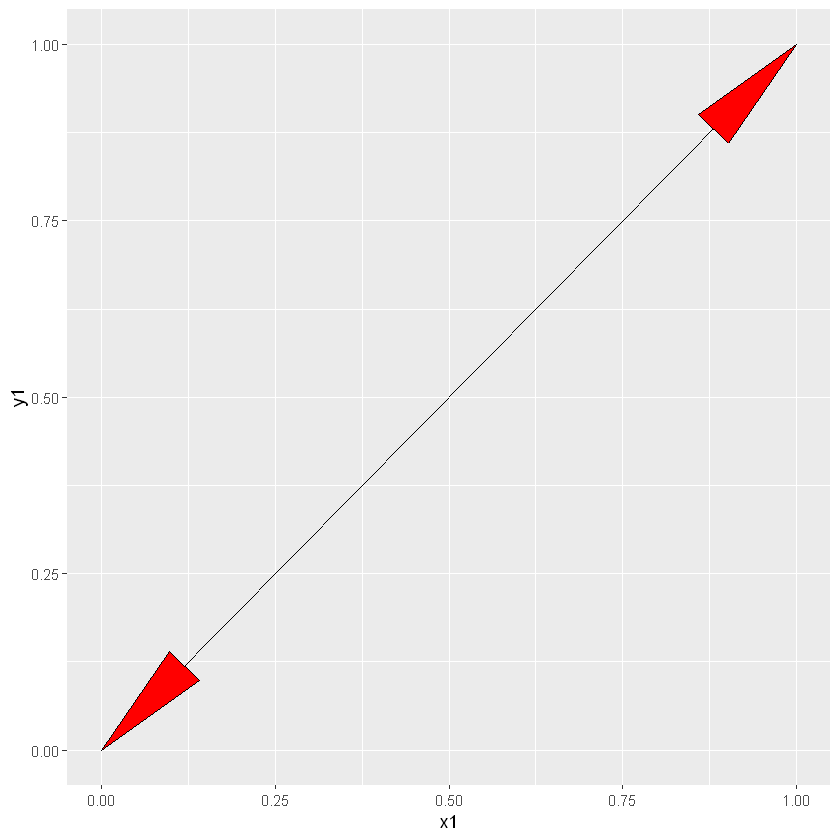

In [72]:
seg <- data.frame(x1 = 0, x2 = 1, y1 = 0, y2 = 1)
#see ?arrow for more detail
arr <- arrow(ends = 'both',                      #draw arrow head on 'both' end of the line ('both', 'last', 'first')
             type = 'closed',                    #the arrow head should be a 'closed' triangle ('open' or 'closed')
             length = unit(1, 'inches'),         #A unit specifying the length of the arrow head (from tip to base).
             angle = 10                          #smaller numbers produce narrower, pointier arrows). Essentially, the width of the arrow head.
            )
ggplot() +
geom_segment(mapping = aes(x = x1, xend = x2, y = y1, yend = y2), 
             data = seg,
             arrow = arr,   
             arrow.fill = 'red' #facecolor of the arrow
            )

In [66]:
?arrow

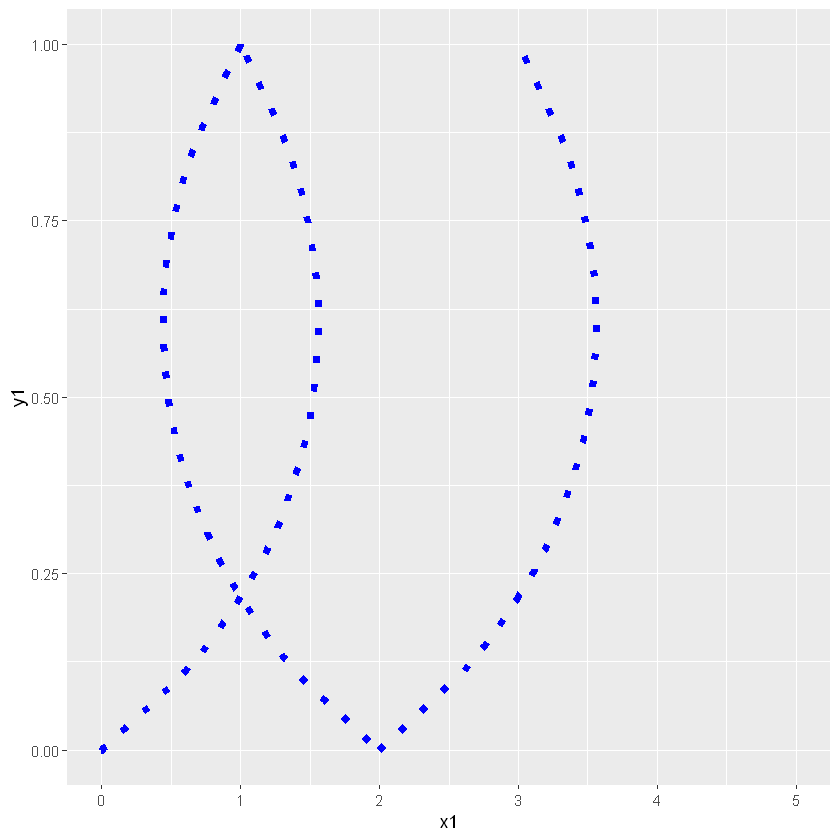

In [54]:
ggplot() +
geom_curve(mapping = aes(x = x1, xend = x2, y = y1, yend = y2), 
           data = seg,
           curvature = .4,
           size = 2,           #linewidth
           color = 'blue',     #color
           linetype = 'dotted' #linestyle
) + 
xlim(0, 5)

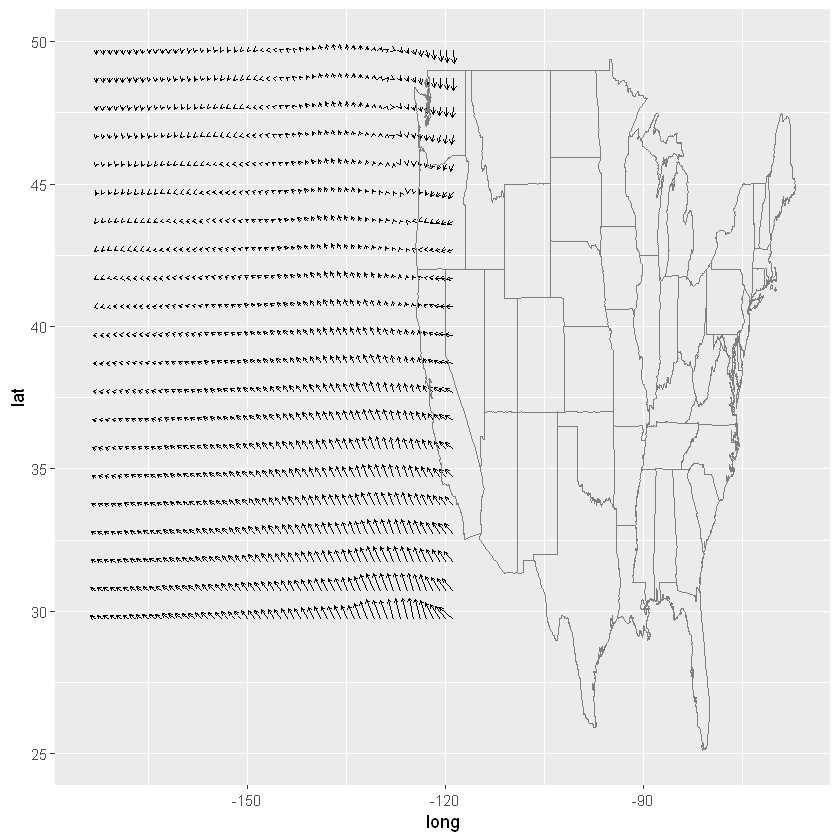

In [52]:
ggplot(seals, aes(long, lat)) +
  geom_segment(aes(xend = long + delta_long, yend = lat + delta_lat),
    arrow = arrow(length = unit(0.1,"cm"))) +
  borders("state")

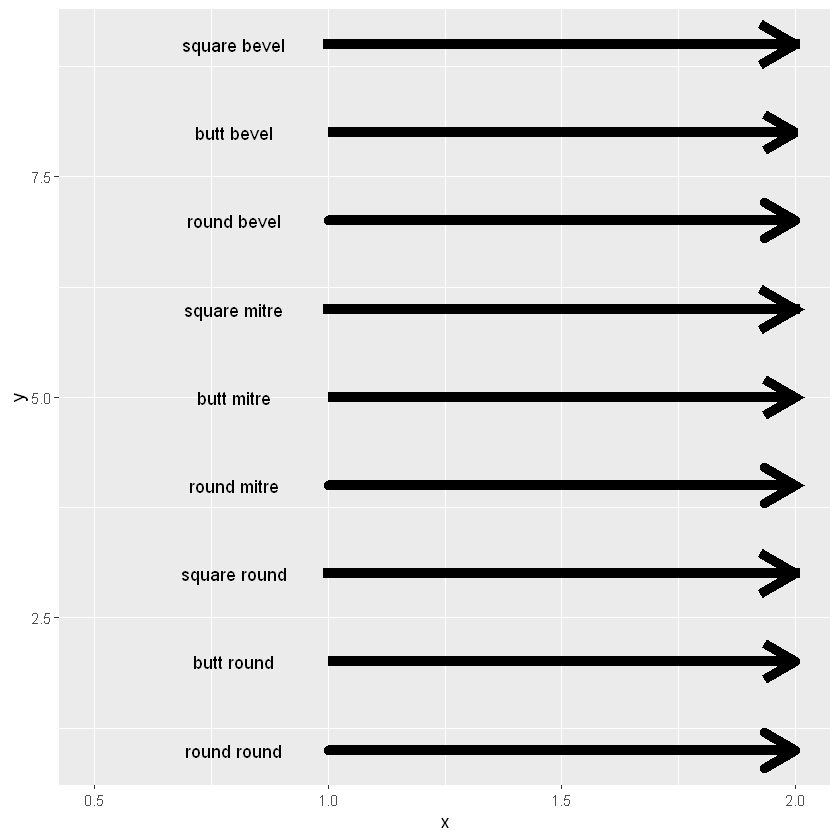

In [55]:

# Use lineend and linejoin to change the style of the segments
df2 <- expand.grid(
  lineend = c('round', 'butt', 'square'),
  linejoin = c('round', 'mitre', 'bevel'),
  stringsAsFactors = FALSE
)
df2 <- data.frame(df2, y = 1:9)
ggplot(df2, aes(x = 1, y = y, xend = 2, yend = y, label = paste(lineend, linejoin))) +
  geom_segment(
     lineend = df2$lineend, linejoin = df2$linejoin,
     size = 3, arrow = arrow(length = unit(0.3, "inches"))
  ) +
  geom_text(hjust = 'outside', nudge_x = -0.2) +
  xlim(0.5, 2)


# Connect observations

**`geom_path()`** connects the observations in the order in which they appear in the data

```R
geom_path(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  lineend = "butt",
  linejoin = "round",
  linemitre = 10,
  arrow = NULL,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

### Aesthetic


**`geom_path()`** understands the following aesthetics (required aesthetics are in bold):

**x**

**y**

alpha

colour

group

linetype

size

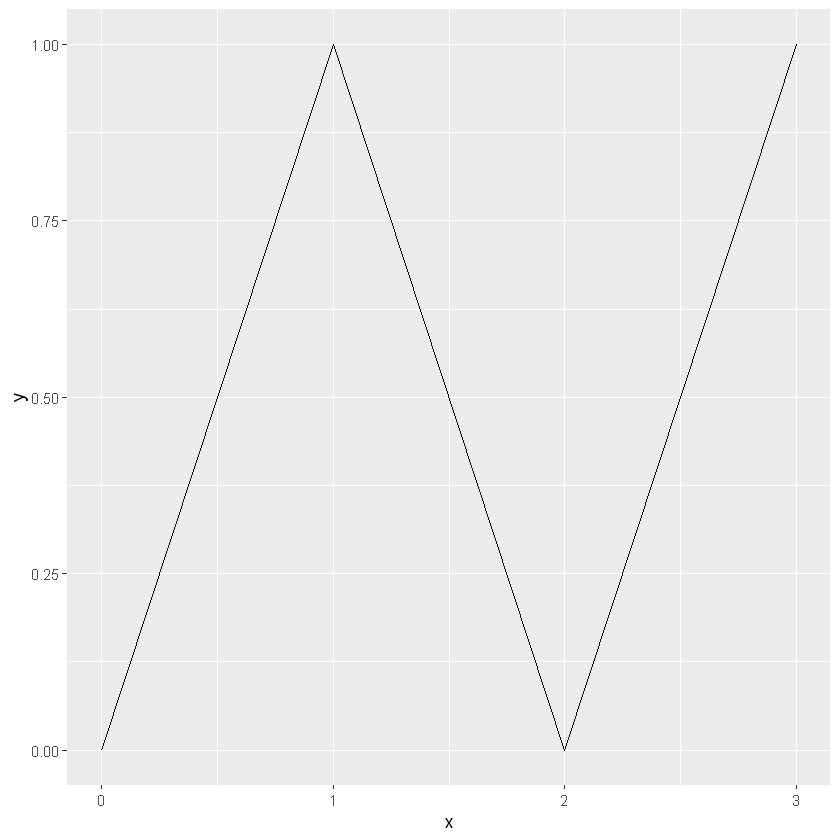

In [78]:
path <- data.frame(x = c(0, 1, 2, 3), y = c(0, 1, 0, 1))
#path: (0,0) -> (1, 1) -> (2, 0) -> (3,1)
ggplot() + 
geom_path(aes(x, y), path)

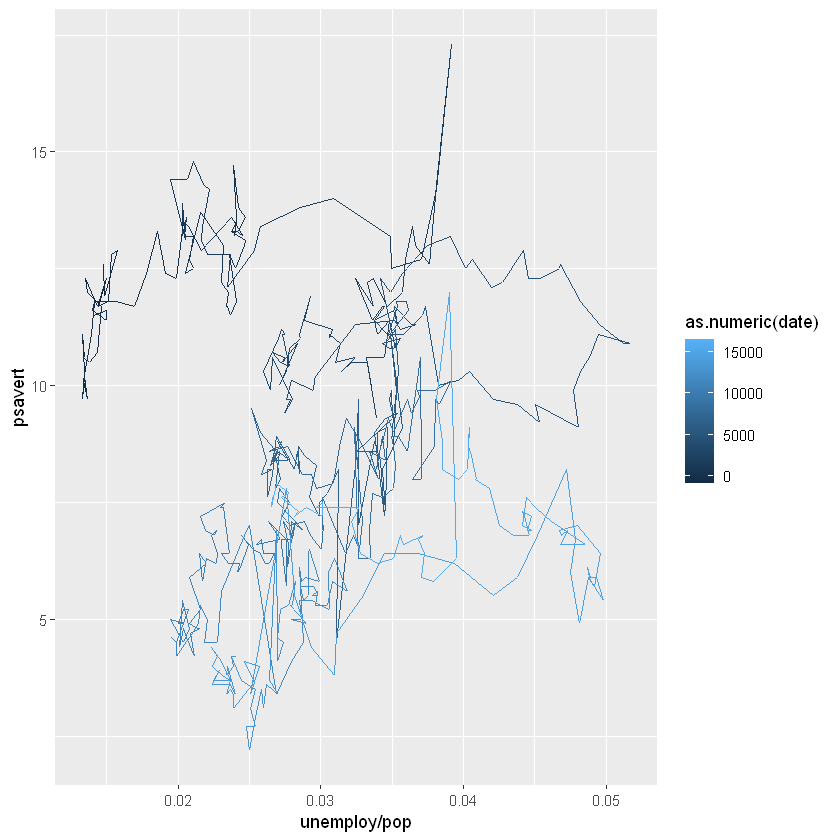

In [74]:
# geom_path lets you explore how two variables are related over time,
# e.g. unemployment and personal savings rate
m <- ggplot(economics, aes(unemploy/pop, psavert))
m + geom_path(aes(colour = as.numeric(date)))

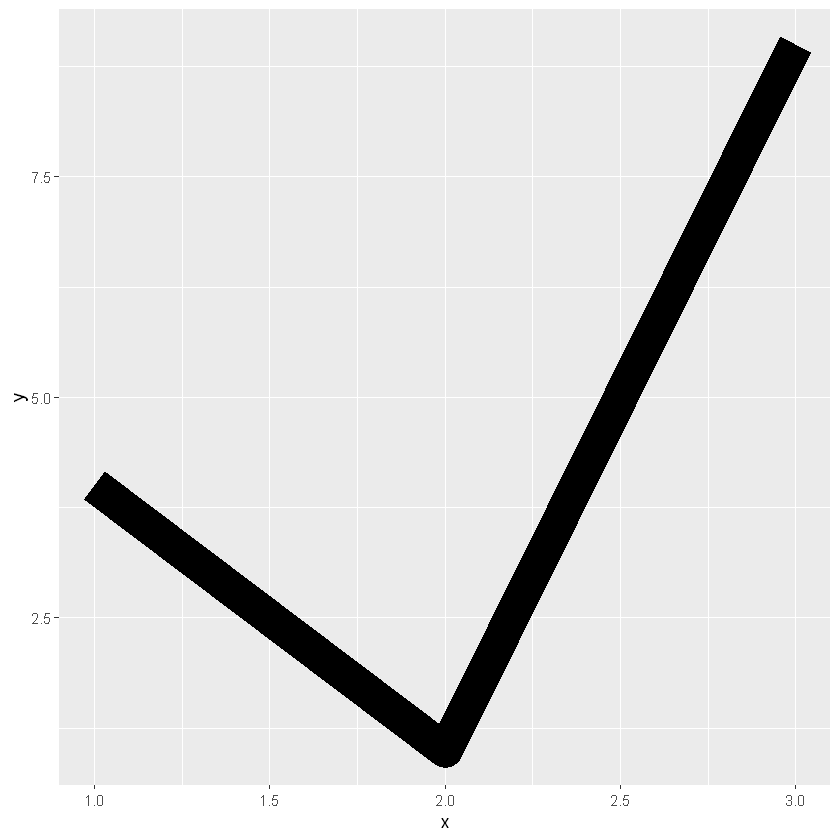

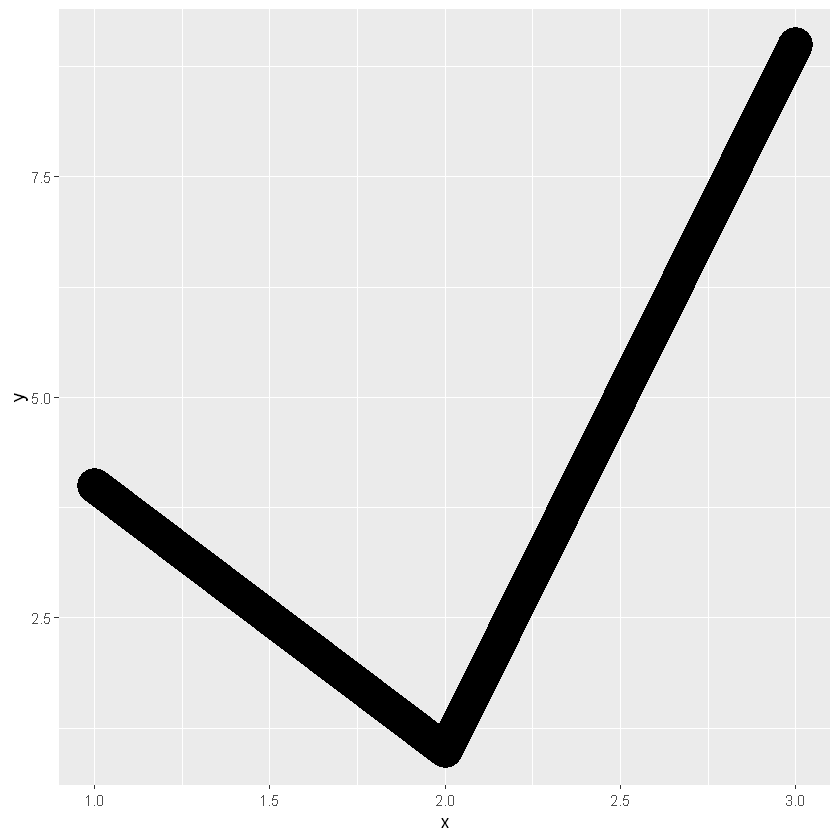

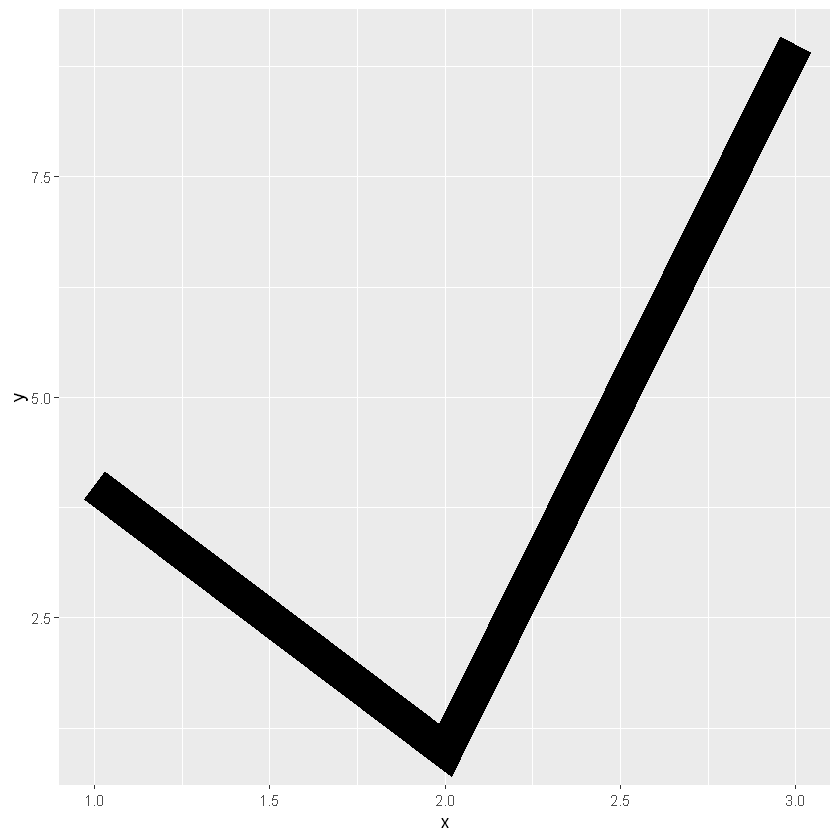

In [79]:
# Control line join parameters
df <- data.frame(x = 1:3, y = c(4, 1, 9))
base <- ggplot(df, aes(x, y))
base + geom_path(size = 10)
base + geom_path(size = 10, lineend = "round")
base + geom_path(size = 10, linejoin = "mitre", lineend = "butt")


# Polygons

Polygons are very similar to paths (as drawn by **`geom_path()`**) except that the start and end points are connected and the inside is coloured by fill. The group aesthetic determines which cases are connected together into a polygon. From R 3.6 and onwards it is possible to draw polygons with holes by providing a subgroup aesthetic that differentiates the outer ring points from those describing holes in the polygon.

```R
geom_polygon(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  rule = "evenodd",
  ...,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`rule`: Either "evenodd" or "winding". If polygons with holes are being drawn (using the subgroup aesthetic) this argument defines how the hole coordinates are interpreted. See the examples in grid::pathGrob() for an explanation.

### Aesthetics

**`geom_polygon()`** understands the following aesthetics (required aesthetics are in bold):

**x**

**y**

alpha

colour

fill

group

linetype

size

subgroup

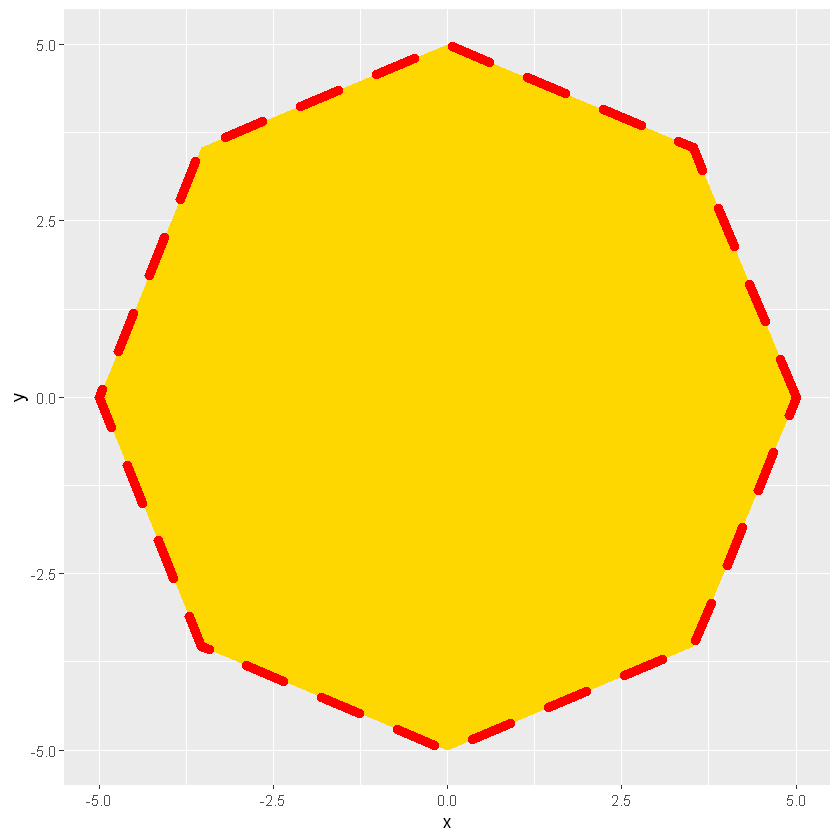

In [111]:
theta <- seq(0, 2 * pi, length.out = 9)
r <- 5
v <- data.frame(x = r * cos(theta), y = r * sin(theta))

ggplot() + 
geom_polygon(mapping = aes(x, y), 
             data = v,
             size = 3,            #line width
             color = 'red',       #line color
             linetype = 'dashed', #linestyle
             fill = 'gold'        #facecolor
            )

<hr>

<b style = 'color:red'>Document Examples</b>

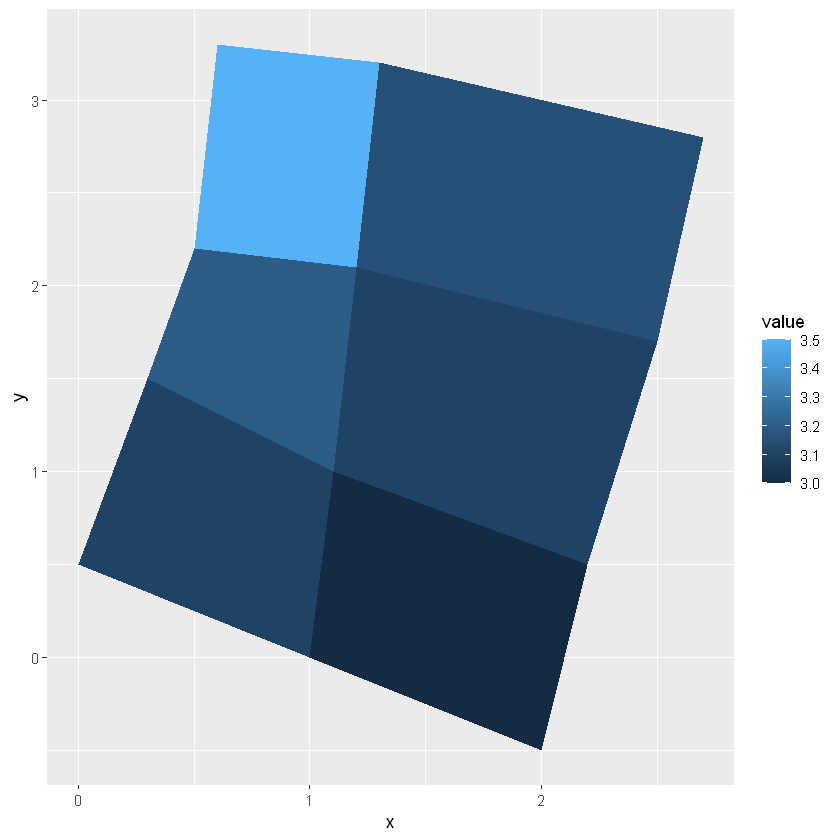

In [113]:
# When using geom_polygon, you will typically need two data frames:
# one contains the coordinates of each polygon (positions),  and the
# other the values associated with each polygon (values).  An id
# variable links the two together

ids <- factor(c("1.1", "2.1", "1.2", "2.2", "1.3", "2.3"))

values <- data.frame(
  id = ids,
  value = c(3, 3.1, 3.1, 3.2, 3.15, 3.5)
)

positions <- data.frame(
  id = rep(ids, each = 4),
  x = c(2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 1.1, 0.3,
  0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 0.6, 1.3),
  y = c(-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 1, 1.5,
  2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 3.3, 3.2)
)

# Currently we need to manually merge the two together
datapoly <- merge(values, positions, by = c("id"))

p <- ggplot(datapoly, aes(x = x, y = y)) +
  geom_polygon(aes(fill = value, group = id))
p

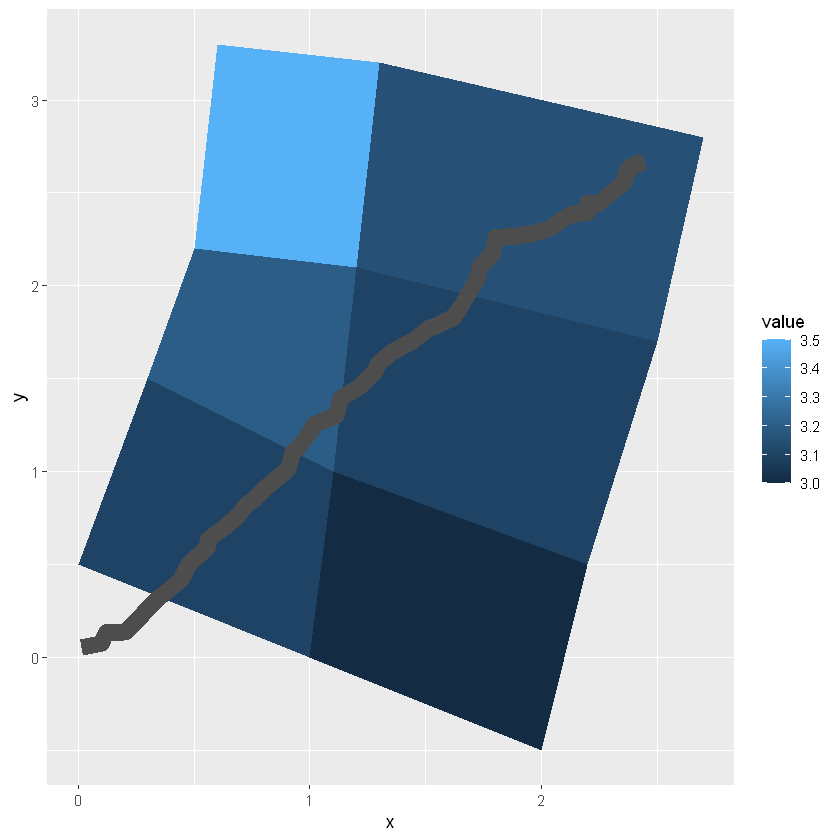

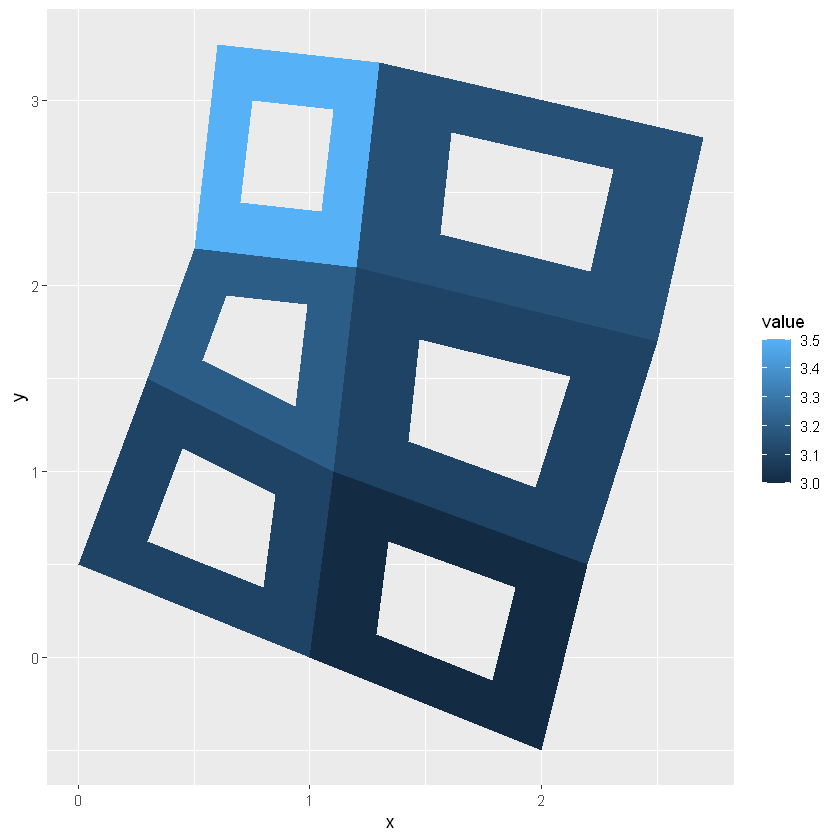

In [114]:
# Which seems like a lot of work, but then it's easy to add on
# other features in this coordinate system, e.g.:

stream <- data.frame(
  x = cumsum(runif(50, max = 0.1)),
  y = cumsum(runif(50,max = 0.1))
)

p + geom_line(data = stream, colour = "grey30", size = 5)

# And if the positions are in longitude and latitude, you can use
# coord_map to produce different map projections.

if (packageVersion("grid") >= "3.6") {
  # As of R version 3.6 geom_polygon() supports polygons with holes
  # Use the subgroup aesthetic to differentiate holes from the main polygon

  holes <- do.call(rbind, lapply(split(datapoly, datapoly$id), function(df) {
    df$x <- df$x + 0.5 * (mean(df$x) - df$x)
    df$y <- df$y + 0.5 * (mean(df$y) - df$y)
    df
  }))
  datapoly$subid <- 1L
  holes$subid <- 2L
  datapoly <- rbind(datapoly, holes)

  p <- ggplot(datapoly, aes(x = x, y = y)) +
    geom_polygon(aes(fill = value, group = id, subgroup = subid))
  p
}

# Rectangles

**`geom_rect()`** and **`geom_tile()`** do the same thing, but are parameterised differently: `geom_rect()` uses the locations of the four corners (xmin, xmax, ymin and ymax), while `geom_tile()` uses the center of the tile and its size (x, y, width, height). `geom_raster` is a high performance special case for when all the tiles are the same size.

```R
geom_raster(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  hjust = 0.5,
  vjust = 0.5,
  interpolate = FALSE,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_rect(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  linejoin = "mitre",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_tile(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  linejoin = "mitre",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`hjust`, `vjust`	
horizontal and vertical justification of the grob. Each justification value should be a number between 0 and 1. Defaults to 0.5 for both, centering each pixel over its data location.

`interpolate`	
If TRUE interpolate linearly, if FALSE (the default) don't interpolate.

### Aesthetic

**`geom_tile()`** understands the following aesthetics (required aesthetics are in bold):

**x**

**y**

alpha

colour

fill

group

height

linetype

size

width

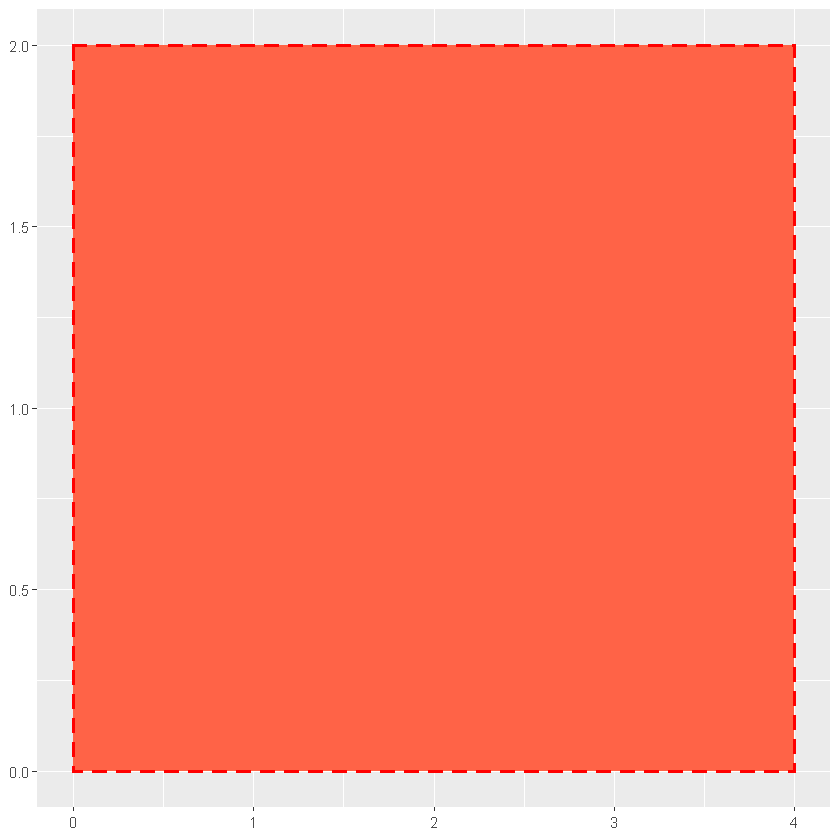

In [127]:
rect_rect <- data.frame(xmin = 0, ymin = 0, xmax = 4, ymax = 2)

ggplot() + 
geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax), 
          data = rect_rect,
          color = 'red',      #line color
          linetype = 'dashed',#line style
          size = 1,           #line width
          fill = 'tomato'     #facecolor 
         )

In [130]:
head(faithfuld)

eruptions,waiting,density
1.600000,43,0.003216159
1.647297,43,0.003835375
1.694595,43,0.004435548
1.741892,43,0.004977614
1.789189,43,0.005424238
1.836486,43,0.005744544


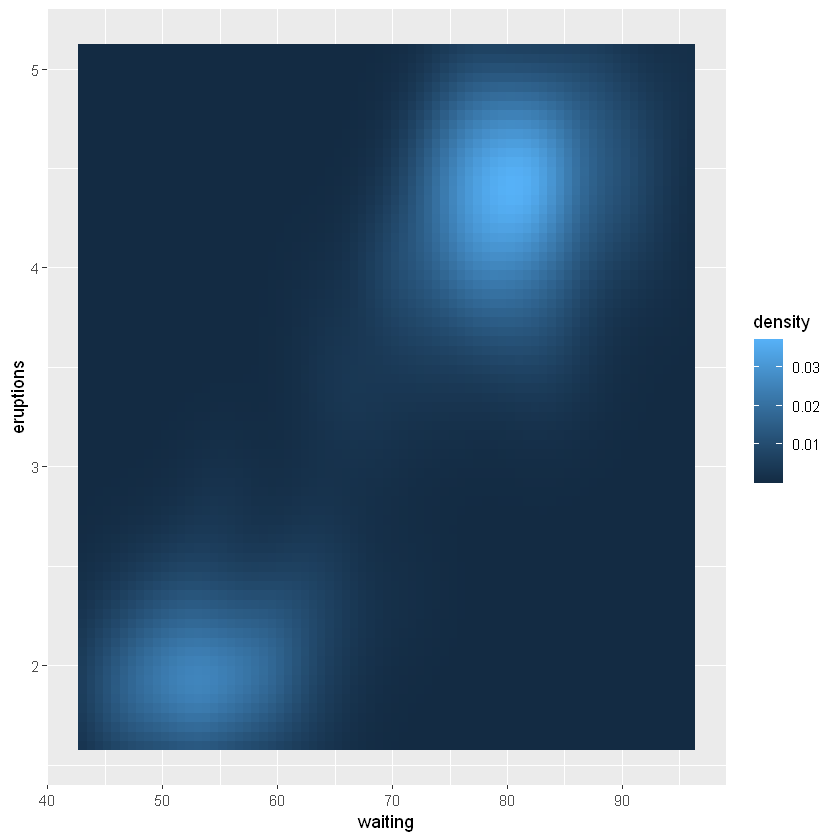

In [128]:
# The most common use for rectangles is to draw a surface. You always want
# to use geom_raster here because it's so much faster, and produces
# smaller output when saving to PDF
ggplot(faithfuld, aes(waiting, eruptions)) +
 geom_raster(aes(fill = density))

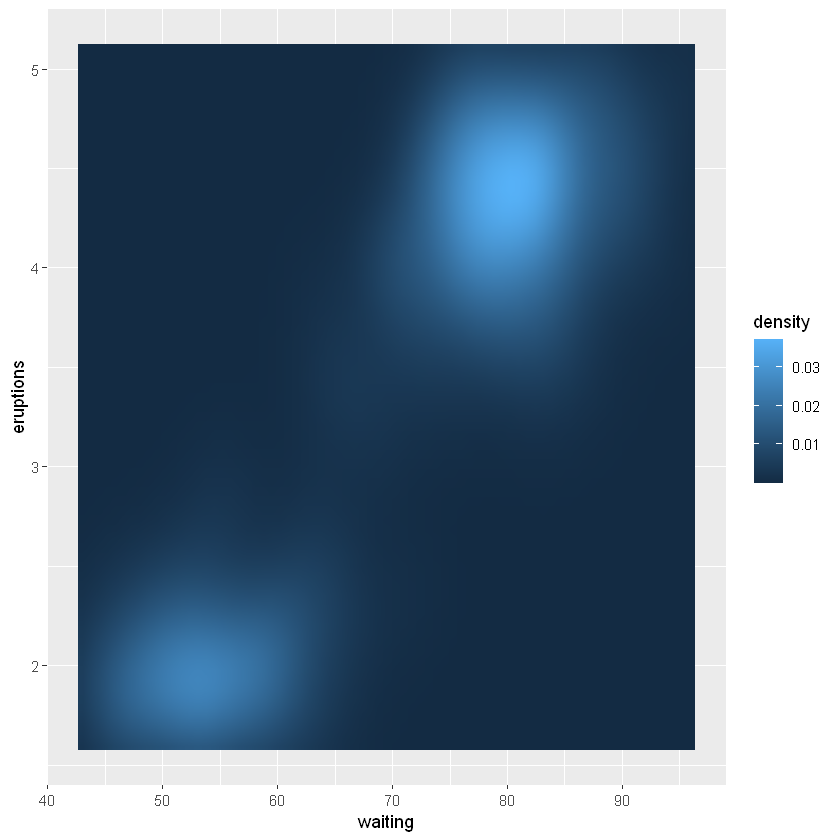

In [131]:
# Interpolation smooths the surface & is most helpful when rendering images.
ggplot(faithfuld, aes(waiting, eruptions)) +
 geom_raster(aes(fill = density), interpolate = TRUE)

# Ribbions and area plot

For each x value, `geom_ribbon()` displays a y interval defined by ymin and ymax. `geom_area()` is a special case of geom_ribbon(), where the ymin is fixed to 0 and y is used instead of ymax.


```R
geom_ribbon(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE,
  outline.type = "both"
)

geom_area(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "stack",
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE,
  ...,
  outline.type = "upper"
)
```

**Arguments**  
`outline.type`	
Type of the outline of the area; "both" draws both the upper and lower lines, "upper"/"lower" draws the respective lines only. "full" draws a closed polygon around the area.

**Details**  
An area plot is the continuous analogue of a stacked bar chart (see geom_bar()), and can be used to show how composition of the whole varies over the range of x. Choosing the order in which different components is stacked is very important, as it becomes increasing hard to see the individual pattern as you move up the stack. See position_stack() for the details of stacking algorithm

### Aesthetic

**`geom_ribbon()`** understands the following aesthetics (required aesthetics are in bold):

**x** or **y**

**ymin** or **xmin**

**ymax** or **xmax**

alpha

colour

fill

group

linetype

size

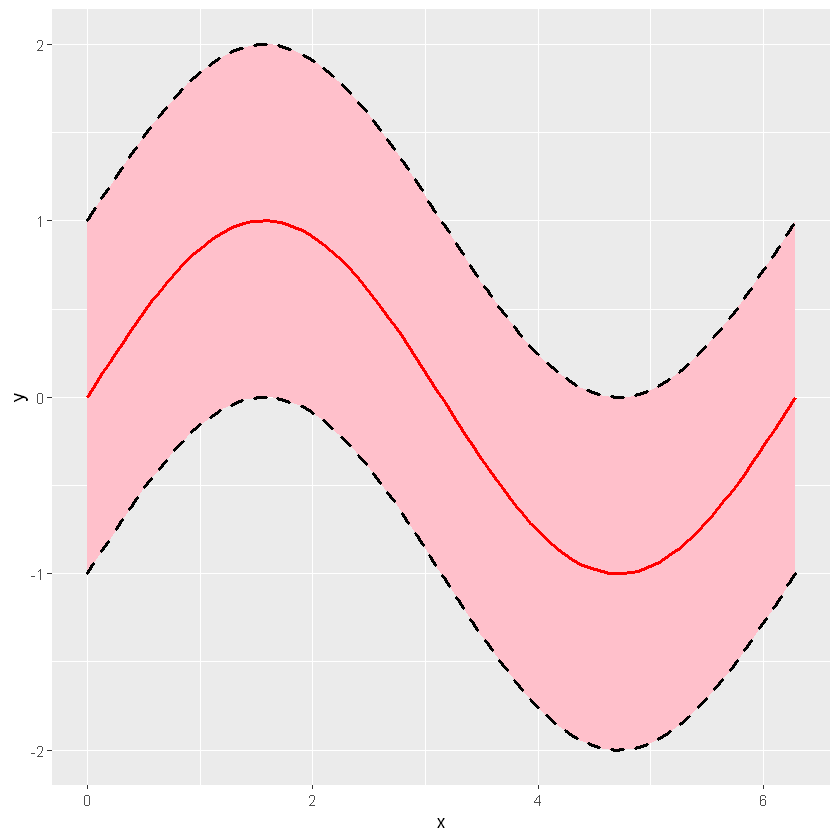

In [141]:
x <- seq(0, 2 * pi, length.out = 100)
y <- sin(x)
curve <- data.frame(x, y)

ggplot() +
#fill between
geom_ribbon(aes(x = x, ymin = y - 1, ymax = y + 1), 
            data = curve,
            fill = 'pink',       #facecolor
            size = 1,            #linewidth
            linetype = 'dashed', #linestyle
            color = 'black'      #linecolor
) +

geom_line(aes(x = x, y = y, size = I(1), color = I('red')))

In [142]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


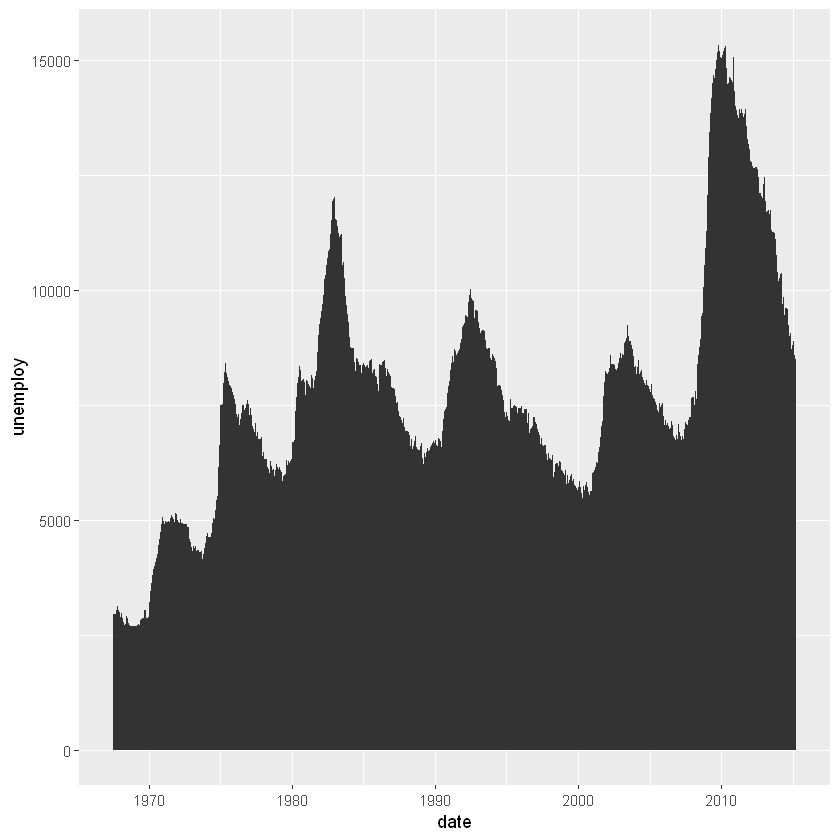

In [147]:
#area plot
ggplot(economics, aes(date, unemploy)) +
geom_area()